# Classificaltion of SPAM messages using Natural Language Processing

In [58]:
import nltk

In [59]:
#nltk.download()

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [61]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [62]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [64]:
messages['length'] = messages['message'].apply(len)

In [65]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


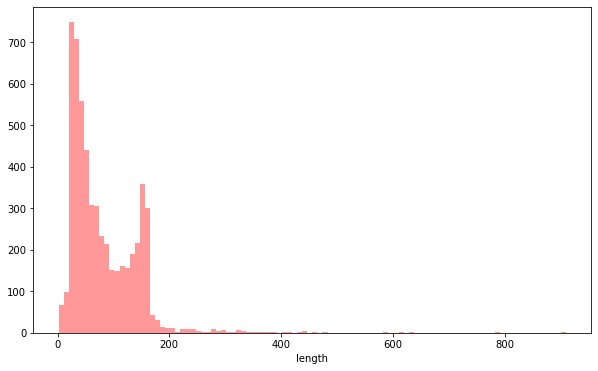

In [66]:
#let's check the distribution of message length
plt.figure(figsize = (10,6))
sns.distplot(messages['length'], bins = 100, kde = False, color = 'red')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020306CE60D0>,
      dtype=object)

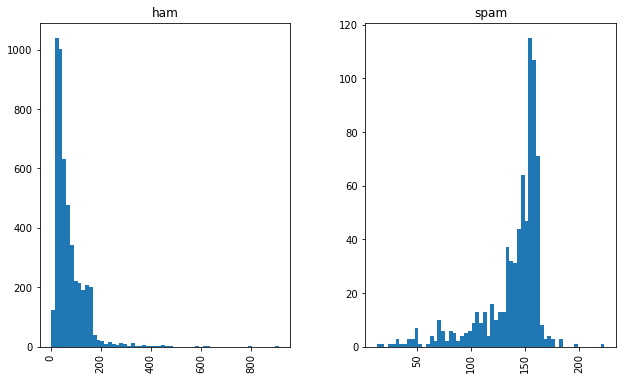

In [67]:
messages.hist(column = 'length', by = 'label', bins = 60, figsize = (10,6))

In [68]:
#Now all the messages will converted into a vector format containing words
#common words such as "the", 'is', 'and', etc. are called stopwords and will be removes from evaluation

import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
#A sample of how the breakdown works

sample_message = 'Hello! this is Jake from StateFarm.'

without_punc = [ch for ch in sample_message if ch not in string.punctuation]  #a list of every char in sample_message that is not a punctuation

In [71]:
without_punc    #notice how all punctuations are replaced by whitespace

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'J',
 'a',
 'k',
 'e',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ',
 'S',
 't',
 'a',
 't',
 'e',
 'F',
 'a',
 'r',
 'm']

In [72]:
without_punc = ''.join(without_punc)       #join all characters
without_punc

'Hello this is Jake from StateFarm'

In [75]:
#example of removing stopwords
without_stopwords = [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]

In [76]:
without_stopwords

['Hello', 'Jake', 'StateFarm']

In [90]:

def text_processing(message):
    char_list = [ch for ch in message if ch not in string.punctuation]
    word_list = ''.join(char_list)
    word_list = [word for word in word_list.split() if word.lower() not in stopwords.words('english')]
    return word_list

In [87]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [88]:
#BAG OF WORDS MODEL

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

#CountVectorizer converts each unique word in the list and its count into a matrix format

In [91]:
#we are using all the text data we have to create a bag of words transforming object 

BOW_trfmr = CountVectorizer(analyzer = text_processing).fit(messages['message']) 

In [92]:
print(len(BOW_trfmr.vocabulary_))

11425


In [93]:
third_message = messages['message'][2]

In [94]:
print(third_message)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [96]:
third_BOW = BOW_trfmr.transform([third_message])

In [97]:
print(third_BOW)

#note that second number in the tuple is index of the unique word and number on the right is the number of times it appears

  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1


In [98]:
print(third_BOW.shape)

(1, 11425)


In [99]:
#creating sparse matrix

messages_bow = BOW_trfmr.transform(messages['message'])

In [100]:
messages_bow.shape

(5572, 11425)

In [101]:
#to get non zero occurence
messages_bow.nnz

50548

In [103]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [ ]:
'''
1.Term Frequeny(TF): Measure of no. of times a word appears in a document
2.Inverse Document Frequency(IDF): Measure of number of documents with the word among all documents in reference
'''

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer

In [105]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [106]:
#let's see the tf-idf for third_BOW

tfidf_third = tfidf_transformer.transform(third_BOW)

In [107]:
print(tfidf_third)

  (0, 11123)	0.19104387220509106
  (0, 11084)	0.15898145347176754
  (0, 10686)	0.13995540820792943
  (0, 10512)	0.2118842499614227
  (0, 9252)	0.16121646071144807
  (0, 9200)	0.22538631044314436
  (0, 9159)	0.22538631044314436
  (0, 6557)	0.18466951562322612
  (0, 6331)	0.347904654589528
  (0, 5619)	0.1887440015250524
  (0, 4731)	0.16452475271486866
  (0, 3953)	0.1544015632869991
  (0, 2804)	0.17524194104333074
  (0, 1941)	0.1526581729225716
  (0, 1833)	0.4507726208862887
  (0, 1551)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


In [113]:
#let's convert the bow corpus into tf-idf corpus

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [115]:
spam_detection_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [116]:
#let's predict our third message

spam_detection_model.predict(tfidf_third)

array(['spam'], dtype='<U4')

In [117]:
#lets run this on all messages

predictions = spam_detection_model.predict(messages_tfidf)

In [118]:
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [132]:
'''
NOTE that we actually used all our training data for fitting and didn't save any for test. Instead of going 
back, spiliing the data and redoing the procedure, we can reate a pipeline of all the steps carrid out and use the
pipeline to create a new model
'''


"\nNOTE that we actually used all our training data for fitting and didn't save any for test. Instead of going \nback, spiliing the data and redoing the procedure, we can reate a pipeline of all the steps carrid out and use the\npipeline to create a new model\n"

In [120]:
from sklearn.model_selection import train_test_split

In [122]:

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [133]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [134]:
#let's use two pipelines with different classifiers and compare them

pipeline = Pipeline([
    ('BOW', CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classification', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline2 = Pipeline([
    ('BOW', CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classification', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [127]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function text_processing at 0x000002030941C1F0>)),
                ('tfidf', TfidfTransformer()),
                ('classification', MultinomialNB())])

In [129]:
predictions = pipeline.predict(msg_test)

In [131]:
from sklearn.metrics import classification_report

print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1004
        spam       0.71      1.00      0.83       111

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



In [135]:
pipeline2.fit(msg_train,label_train)
predictions = pipeline2.predict(msg_test)

In [137]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       987
        spam       0.81      0.99      0.89       128

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [138]:
#we can see that random forest model had the better spam classification